## Regression
Supervised machine learning techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. The training process fits the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. You can think of this function like this, in which y represents the label we want to predict and x represents the features the model uses to predict it:

y=f(x)

In most cases, x is actually a vector that consists of multiple feature values, so to be a little more precise, the function could be expressed like this:

y=f([x 
1
​
 ,x 
2
​
 ,x 
3
​
 ,...])

The goal of training the model is to find a function that performs some kind of calculation to the x values that produces the result y. We do this by applying a machine learning algorithm that tries to fit the x values to a calculation that produces y reasonably accurately for all of the cases in the training dataset.

There are many machine learning algorithms for supervised learning, and we can broadly divide them into two types:

Regression algorithms: Algorithms that predict a y value that is a numeric value, such as the price of a house or the number of sales transactions.
Classification algorithms: Algorithms that predict to which category, or class, an observation belongs. The y value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.

## Explore the Data
The first step in any machine-learning project is to explore the data that you'll use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict. This may require some work to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), deriving new feature columns by transforming or combining existing features (a process known as feature engineering), normalizing numeric features (values you can measure or count) so they're on a similar scale, and encoding categorical features (values that represent discrete categories) as numeric indicators.

Let's start by loading the bicycle sharing data as a Pandas DataFrame and viewing the first few rows.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2023-08-12 20:42:42--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv'

     0K .......... .......... .......... .......... .......   100%  412K=0.1s

2023-08-12 20:42:43 (412 KB/s) - 'daily-bike-share.csv' saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439


In [3]:
bike_data.shape

(731, 14)

In [2]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [7]:
bike_data['dteday']= pd.to_datetime(bike_data['dteday'])

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


In [9]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [12]:
bike_data['day']= pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [14]:
numeric_features=['temp','atemp','hum','windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\Hp\AppData\Local\Temp\ipykernel_13128\3015081124.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


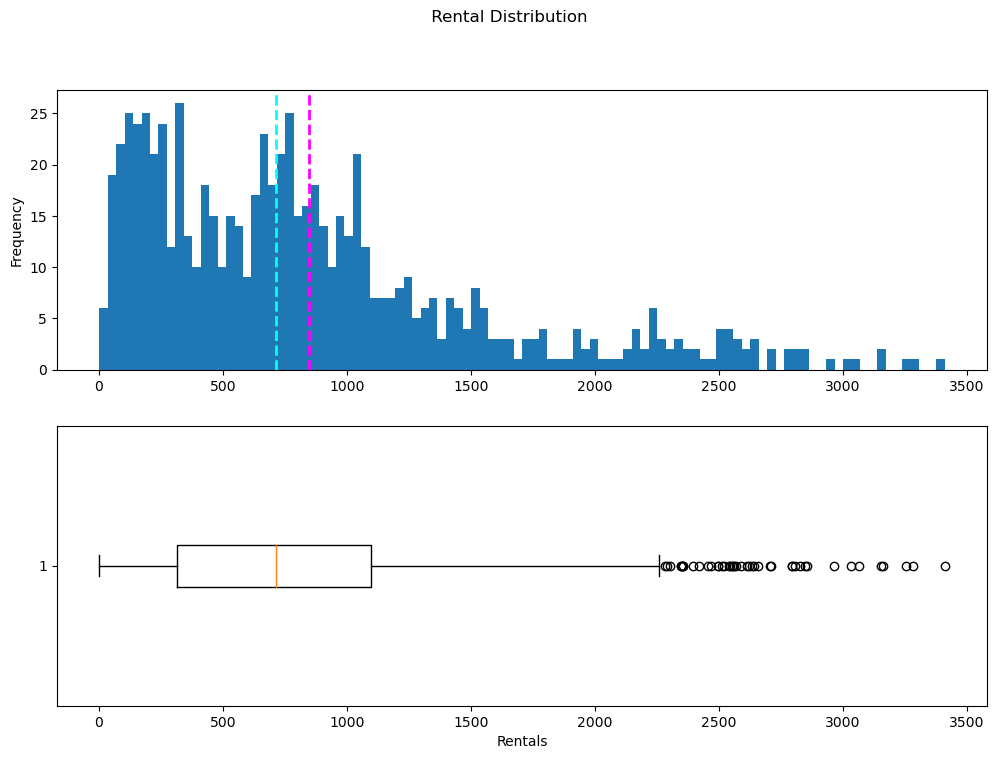

In [21]:
from matplotlib import pyplot as plt
label=bike_data['rentals']

fig, ax = plt.subplots(2,1,figsize=(12,8))
# for histogram
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(),color='magenta',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(),color='cyan',linestyle='dashed',linewidth=2)
# for boxplot
ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle(" Rental Distribution")

fig.show()


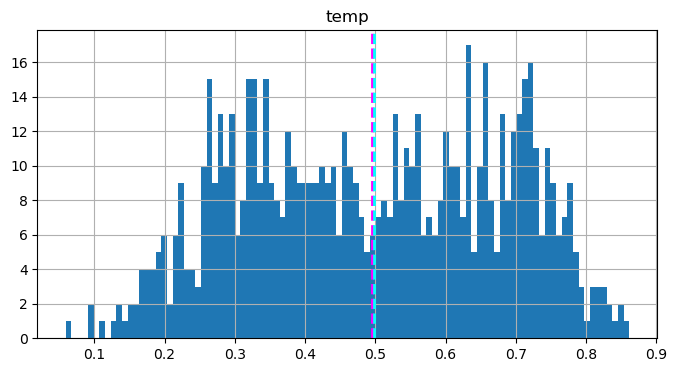

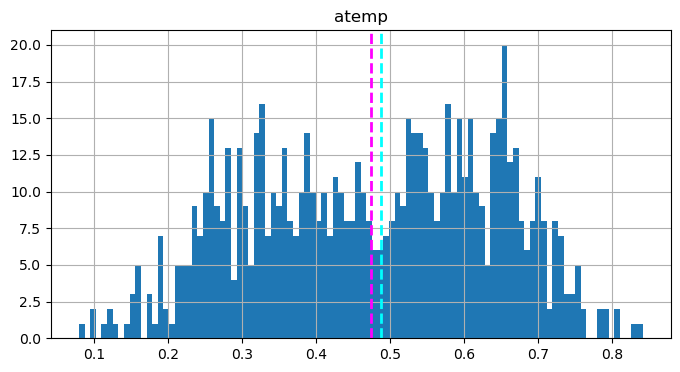

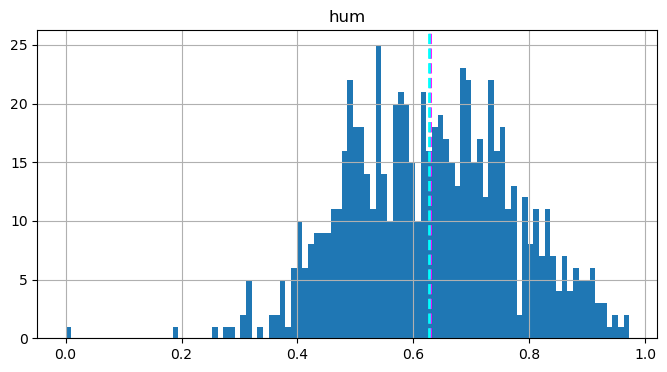

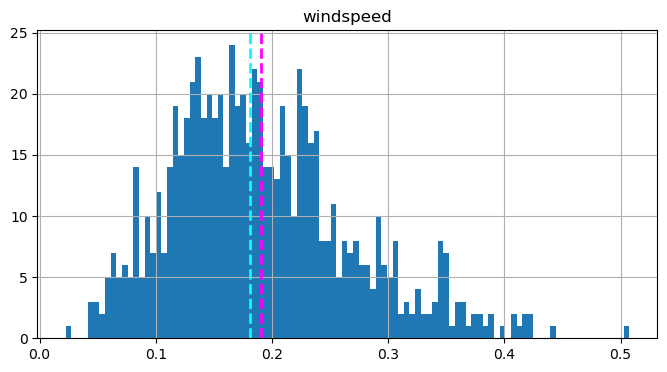

In [28]:
#plot histogram for each numerical feature
for col in numeric_features:
    fig=plt.figure(figsize=(8,4))
    ax=fig.gca()
    feature=bike_data[col]
    feature.hist(bins=100,ax=ax)
    ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
    ax.set_title(col)
        
plt.show()    

In [29]:
import numpy as np

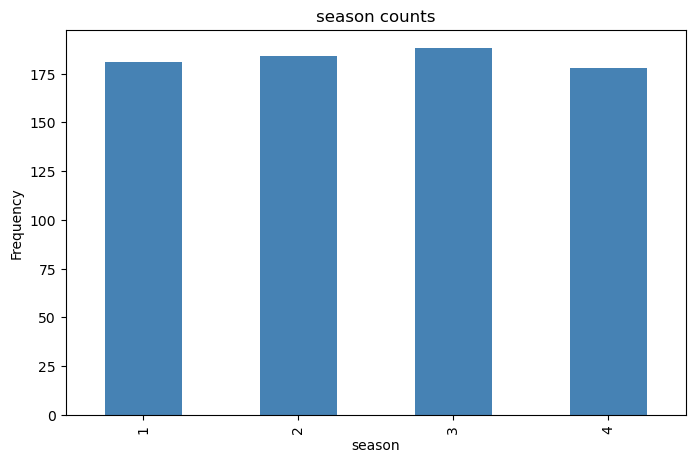

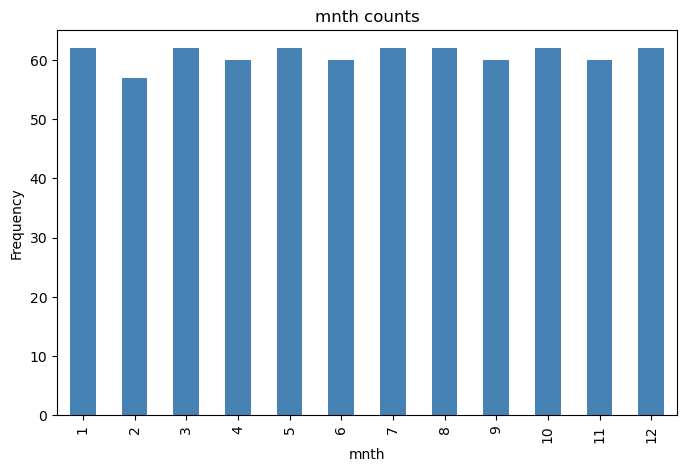

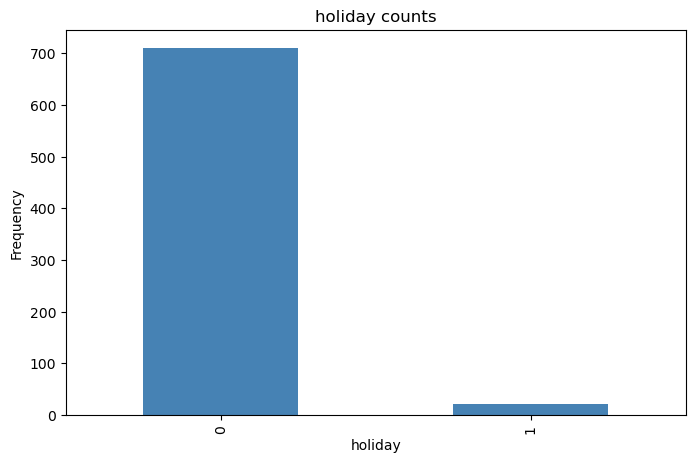

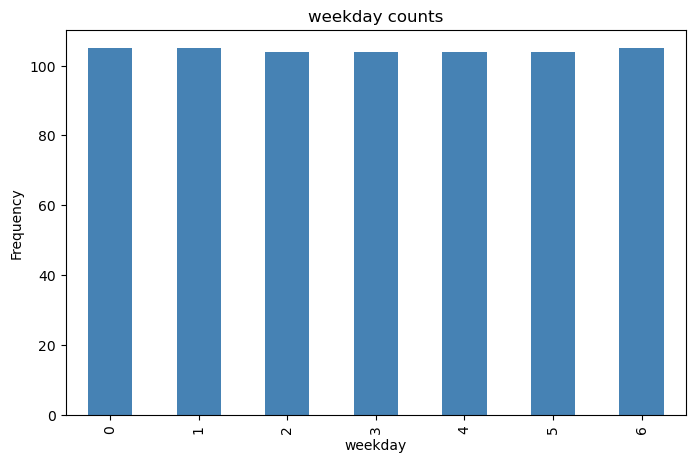

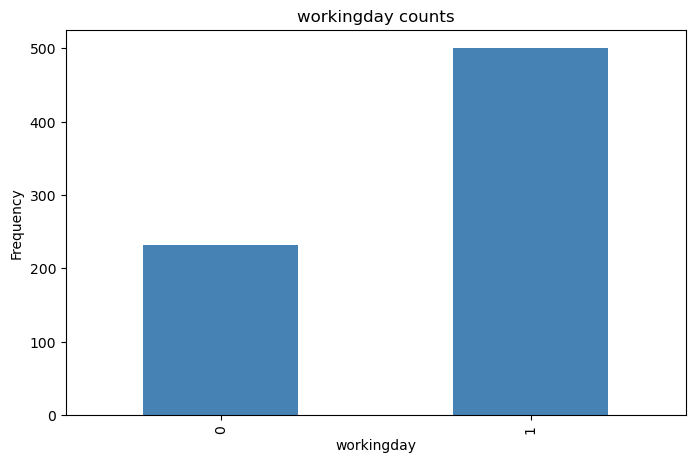

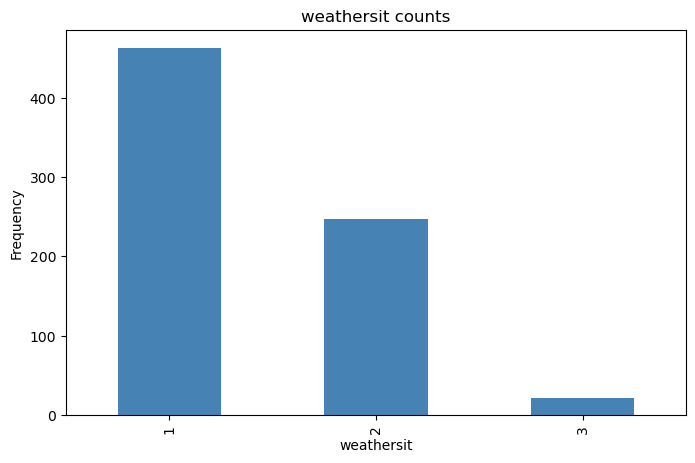

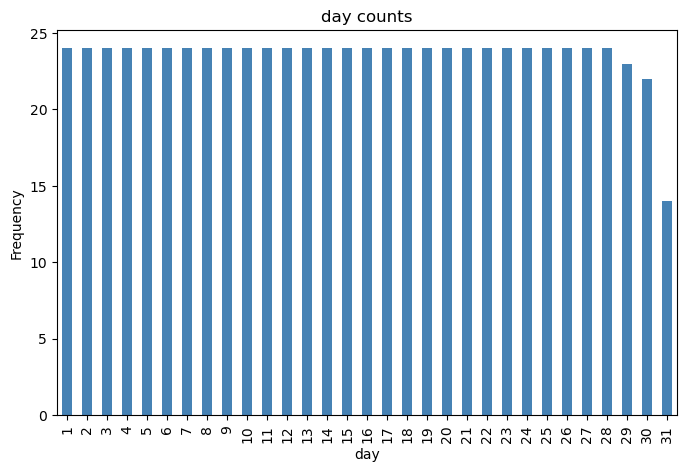

In [37]:
#plot a bar plot for each categorical feature count
categorical_features=['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_features:
    counts=bike_data[col].value_counts().sort_index()
    fig=plt.figure(figsize=(8,5))
    ax=fig.gca()
    counts.plot.bar(ax=ax,color='steelblue')
    ax.set_title(col+' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()    

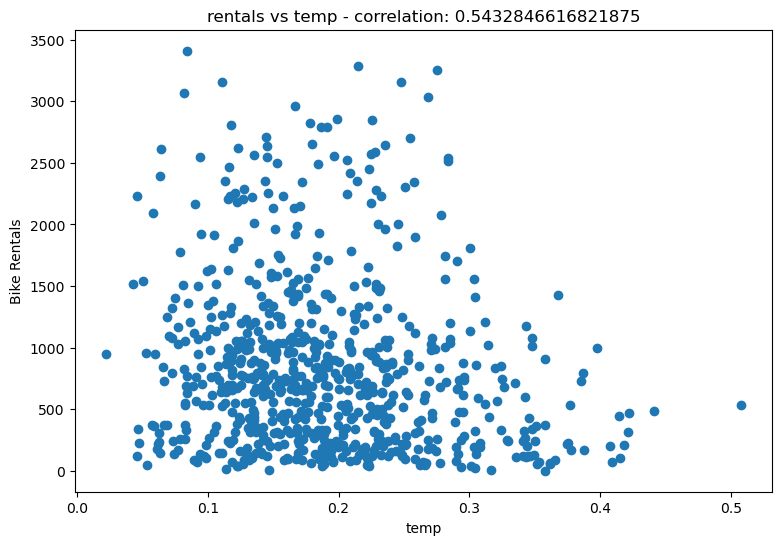

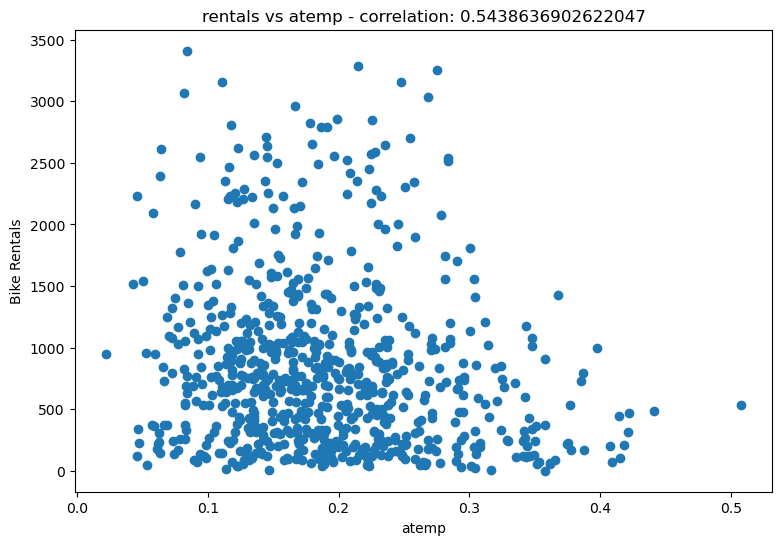

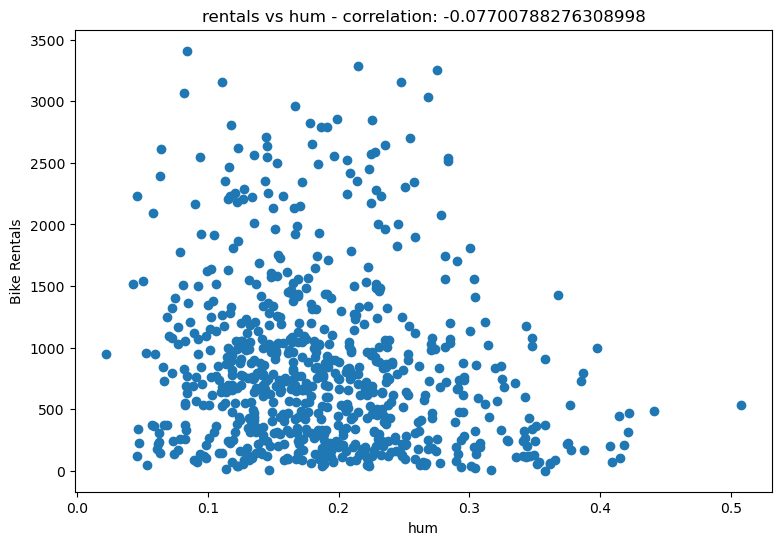

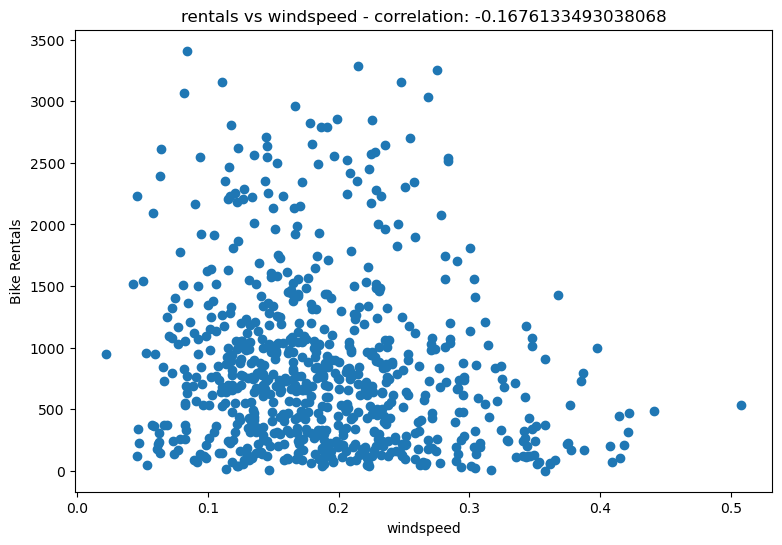

In [38]:
for col in numeric_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    features=bike_data[col]
    label=bike_data['rentals']
    correlation=features.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs '+col+' - correlation: '+str(correlation))
plt.show()    

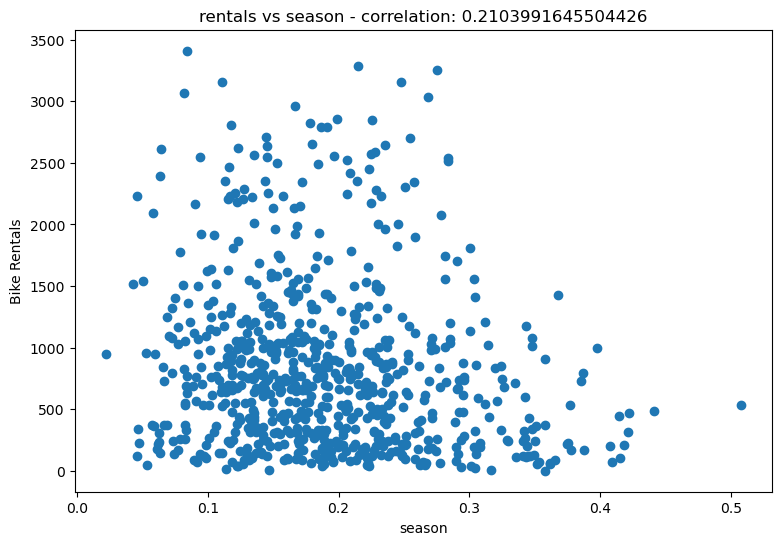

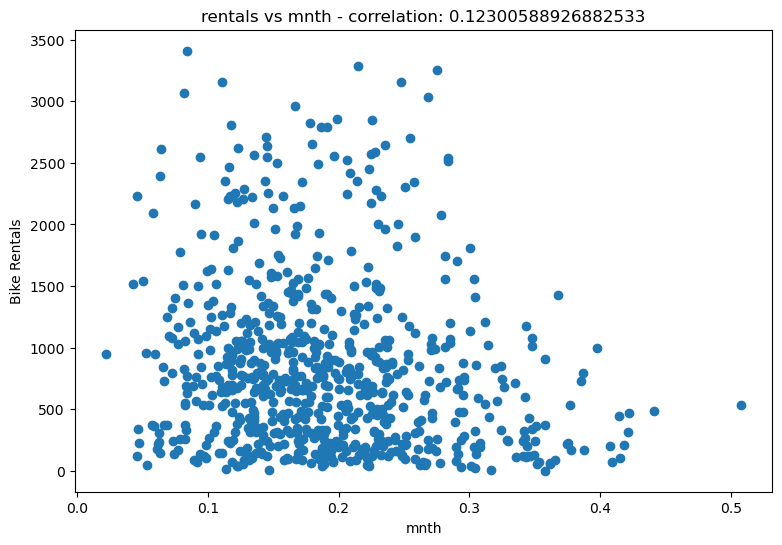

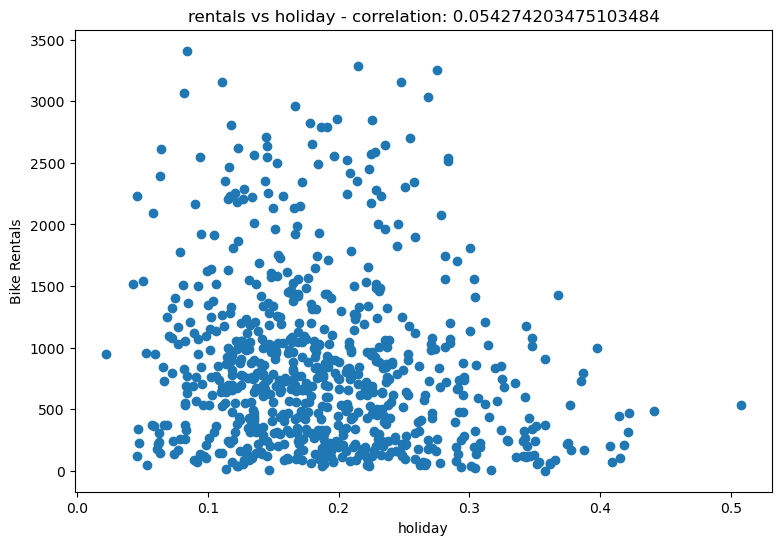

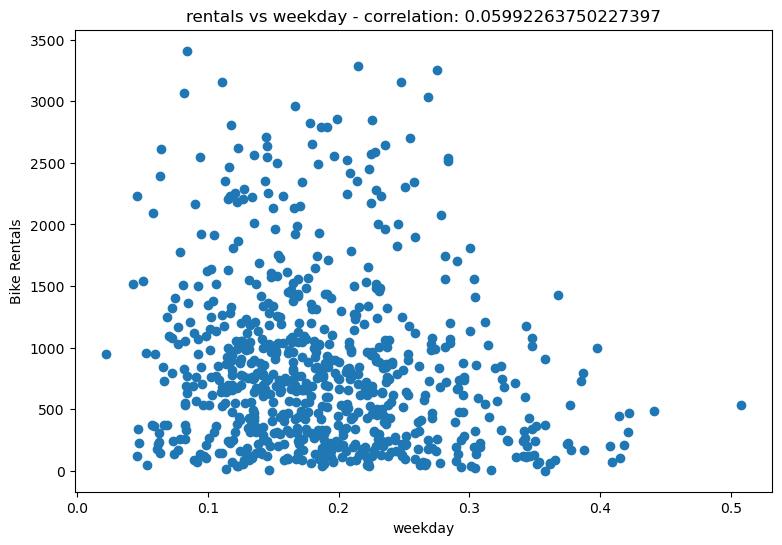

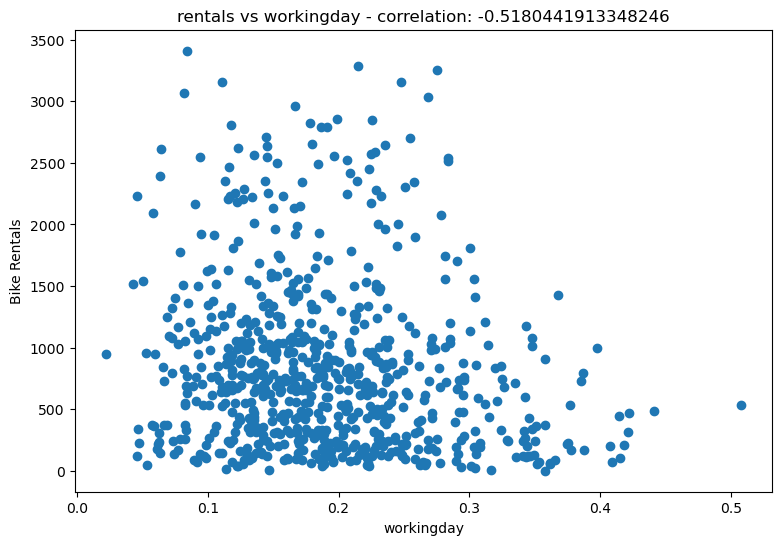

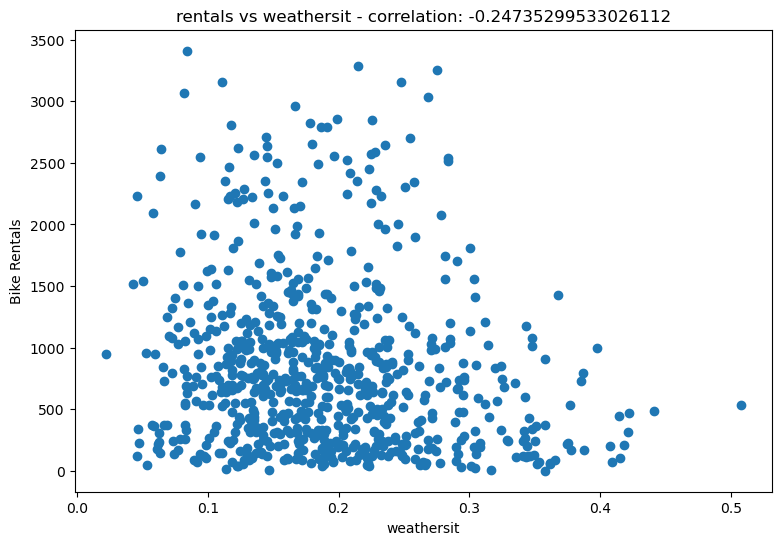

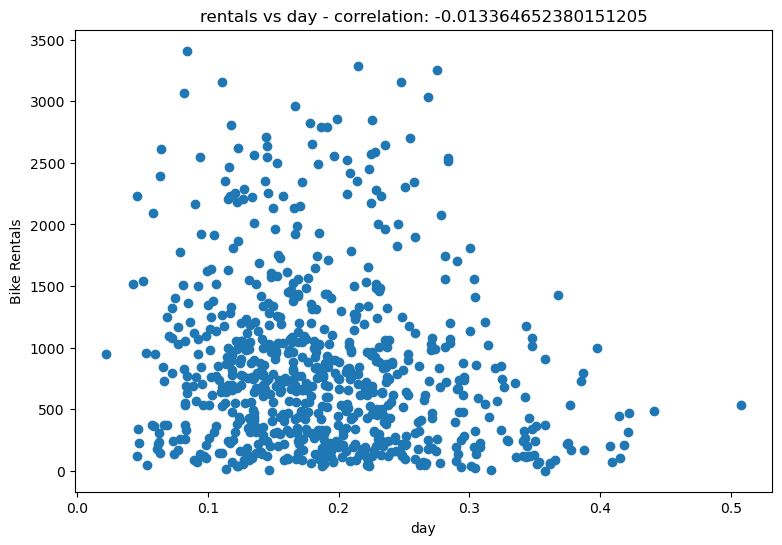

In [39]:
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    features=bike_data[col]
    label=bike_data['rentals']
    correlation=features.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs '+col+' - correlation: '+str(correlation))
plt.show()    

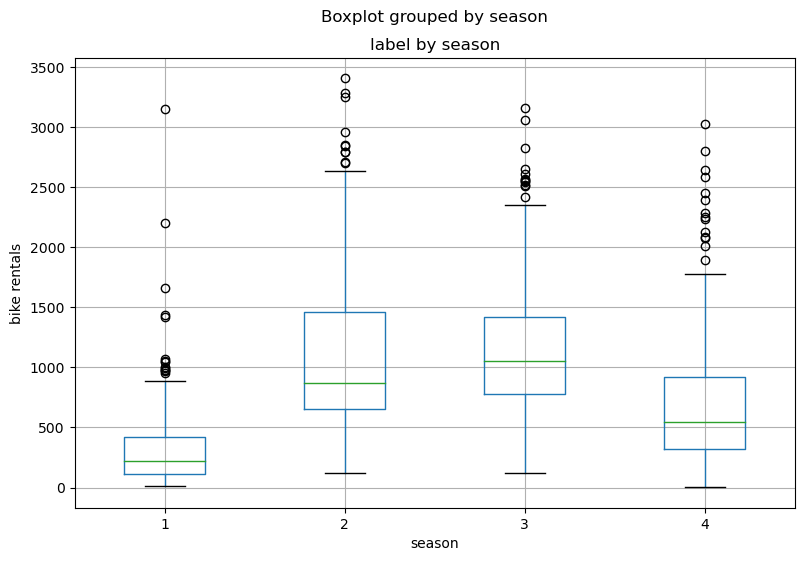

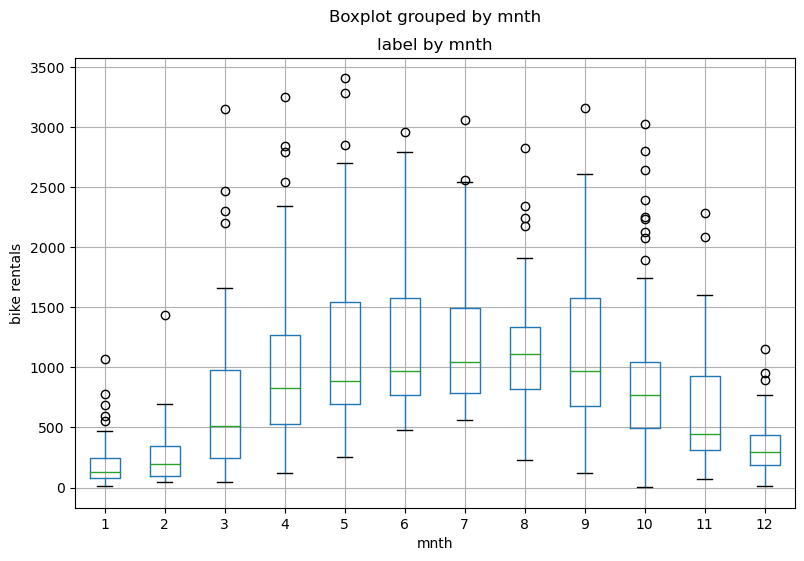

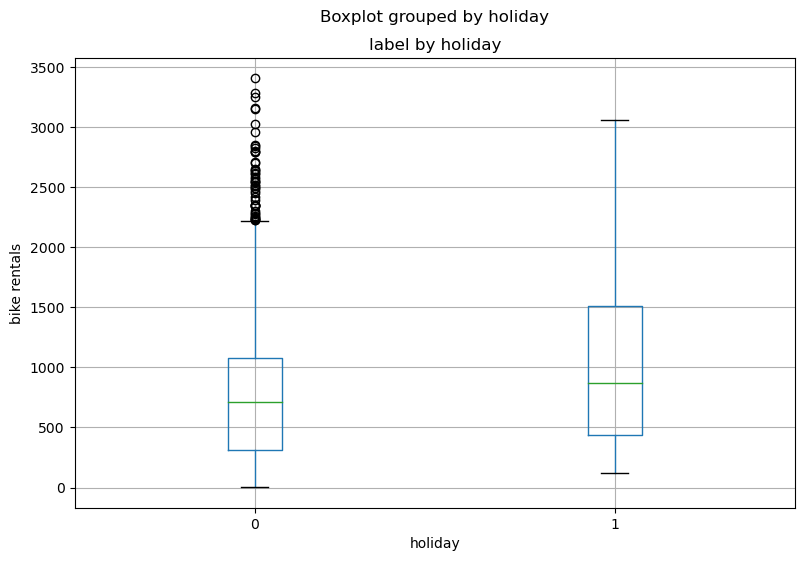

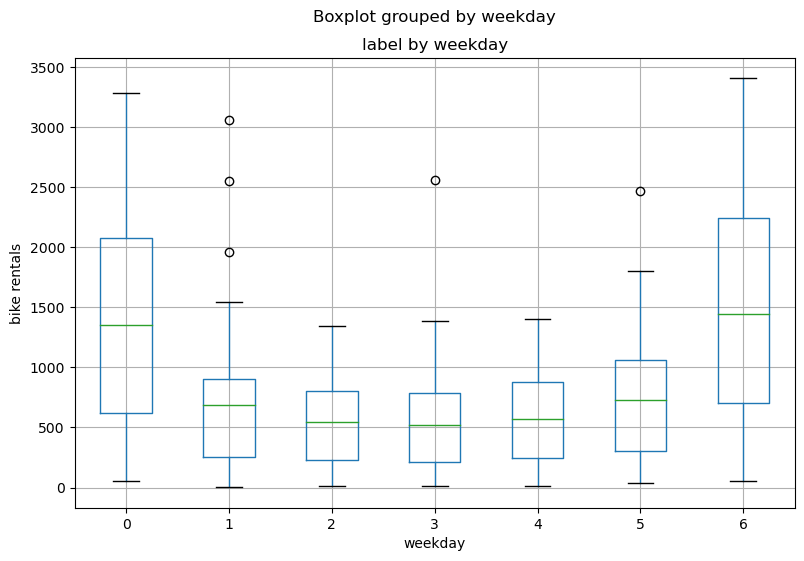

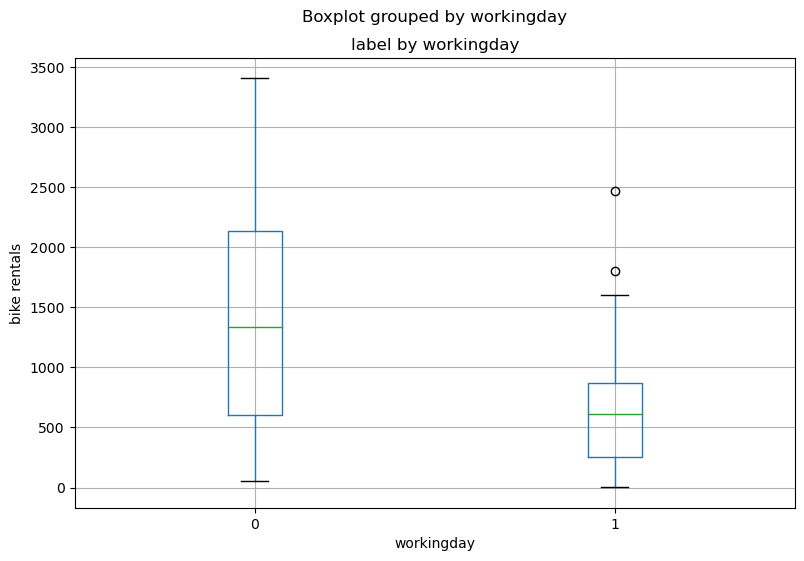

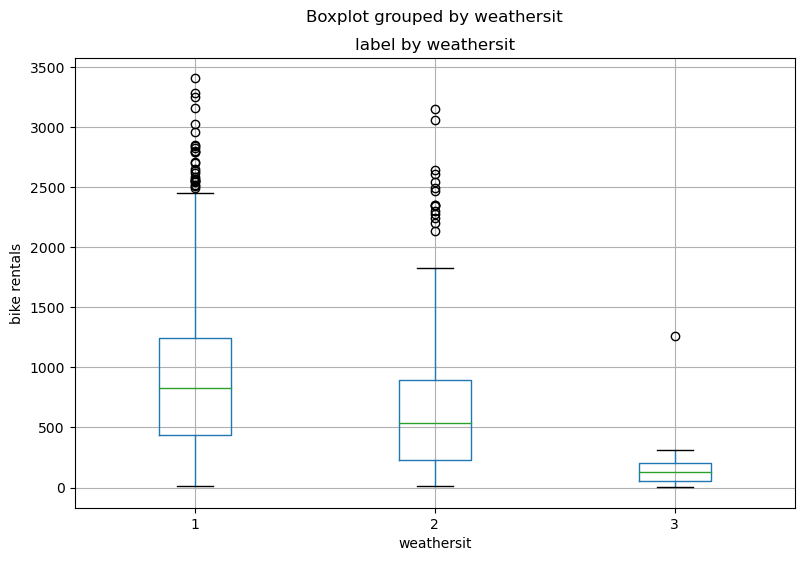

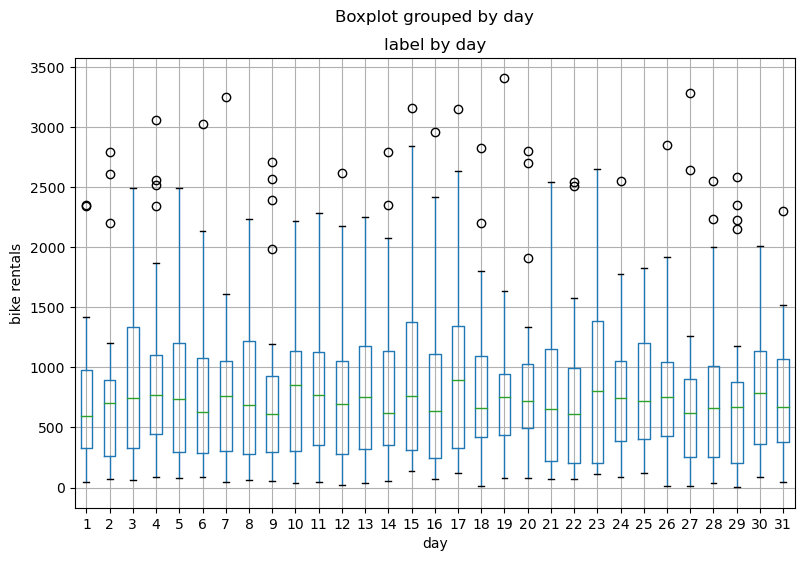

In [41]:
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    bike_data.boxplot(column='rentals',by=col,ax=ax)
    ax.set_title('label by '+col)
    ax.set_ylabel("bike rentals")
    
plt.show()    

## Train a Regression Model

In [43]:
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y=bike_data['rentals'].values
print('Features: ',X[:10],'\n Labels:',y[:10], sep='\n')

Features: 
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.       

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=0)

print('Training set: %d rows\nTest set: %d rows' %(X_train.shape[0],X_test.shape[0]))

Training set: 511 rows
Test set: 220 rows


## Try simple Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
print(model.fit(X_train,y_train))

LinearRegression()


In [64]:
import numpy as np
predictions= model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted Labels : ', np.round(predictions)[:10])
print('Actual labels : ',y_test[:10])

Predicted Labels :  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels :  [2418  754  222   47  244  145  240  555 3252   38]


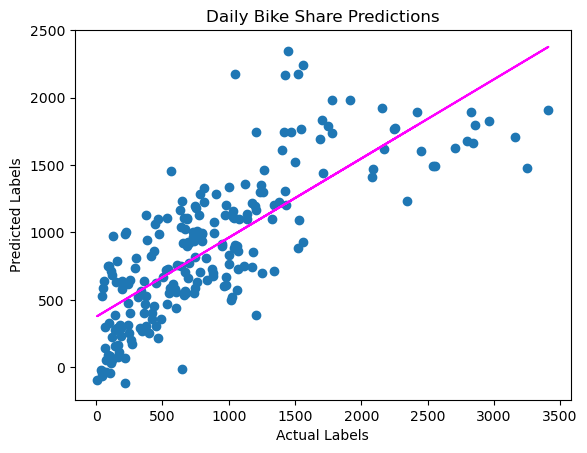

In [65]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


## Another Linear model Laso Algorithm

In [67]:
from sklearn.linear_model import Lasso
model=Lasso().fit(X_train,y_train)
print(model,"\n")

Lasso() 



MSE:  201155.70593338402
RMSE:  448.5038527519959
R2 Score:  0.605646863782449


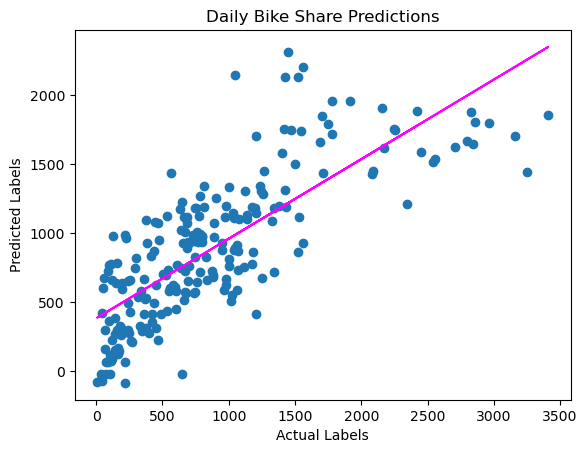

In [68]:
prediction= model.predict(X_test)
mse=mean_squared_error(y_test,prediction)
print('MSE: ', mse)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
r2=r2_score(y_test,prediction)
print('R2 Score: ',r2)


#plot predicted vs actual
plt.scatter(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

#overlay the regression line

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

## Decision Tree algorithm

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# train the model
model=DecisionTreeRegressor().fit(X_train,y_train)
print(model,'\n')

# Visualize the tree model
tree=export_text(model)
tree

DecisionTreeRegressor() 



'|--- feature_6 <= 0.45\n|   |--- feature_4 <= 0.50\n|   |   |--- feature_7 <= 0.32\n|   |   |   |--- feature_8 <= 0.41\n|   |   |   |   |--- feature_1 <= 2.50\n|   |   |   |   |   |--- feature_9 <= 0.33\n|   |   |   |   |   |   |--- feature_8 <= 0.36\n|   |   |   |   |   |   |   |--- value: [558.00]\n|   |   |   |   |   |   |--- feature_8 >  0.36\n|   |   |   |   |   |   |   |--- value: [515.00]\n|   |   |   |   |   |--- feature_9 >  0.33\n|   |   |   |   |   |   |--- value: [317.00]\n|   |   |   |   |--- feature_1 >  2.50\n|   |   |   |   |   |--- feature_9 <= 0.28\n|   |   |   |   |   |   |--- feature_9 <= 0.22\n|   |   |   |   |   |   |   |--- value: [981.00]\n|   |   |   |   |   |   |--- feature_9 >  0.22\n|   |   |   |   |   |   |   |--- value: [968.00]\n|   |   |   |   |   |--- feature_9 >  0.28\n|   |   |   |   |   |   |--- feature_0 <= 2.50\n|   |   |   |   |   |   |   |--- value: [710.00]\n|   |   |   |   |   |   |--- feature_0 >  2.50\n|   |   |   |   |   |   |   |--- value:

MSE:  231548.62272727274
RMSE:  481.19499449523863
R2 Score:  0.5460634579781996


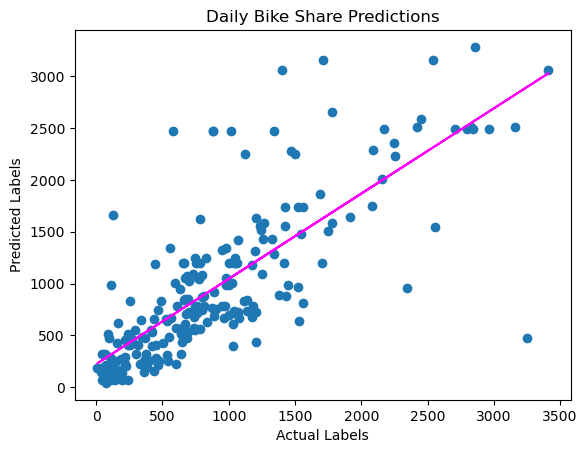

In [70]:
# Evaluate the model the test data
prediction= model.predict(X_test)

mse=mean_squared_error(y_test,prediction)
print('MSE: ',mse)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
r2=r2_score(y_test,prediction)
print("R2 Score: ",r2)


#plot predicted vs actual
plt.scatter(y_test,prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

#overlay the regression line

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

## Ensemble Algorithm
Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

RandomForestRegressor() 

MSE:  112049.08187227273
RMSE:  334.73733265393736
R2 Score:  0.7803348075979455


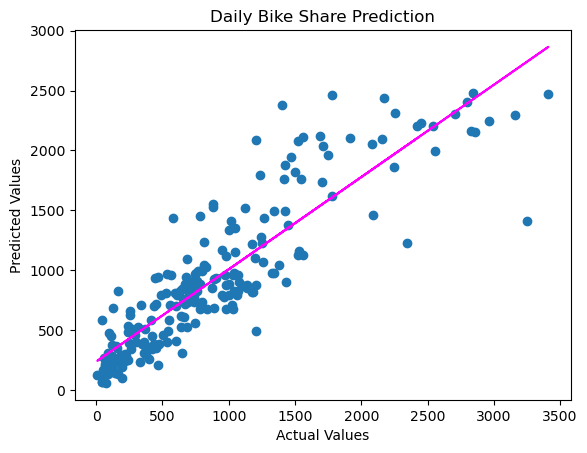

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Train the model

model=RandomForestRegressor().fit(X_train,y_train)
print(model,'\n')

# evaluate the prediction vs actual

prediction=model.predict(X_test)

mse=mean_squared_error(y_test,prediction)
print('MSE: ',mse)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)
r2=r2_score(y_test,prediction)
print('R2 Score: ',r2)

# visualize 
plt.scatter(y_test,prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Daily Bike Share Prediction')

# overlay the regression line
z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

For good measure, let's also try a *boosting* ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees; but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the *loss* (error) in the model.

GradientBoostingRegressor() 

MSE:  104234.67432620023
RMSE:  322.8539520064765
R2 Score:  0.7956544631313378


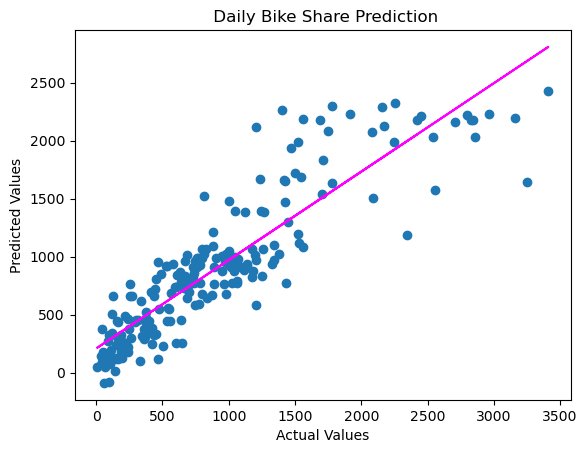

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor().fit(X_train,y_train)
print(model,'\n')

prediction=model.predict(X_test)

mse=mean_squared_error(y_test,prediction)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)

r2=r2_score(y_test,prediction)
print("R2 Score: ",r2)

plt.scatter(y_test,prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(' Daily Bike Share Prediction')

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()


# improve model with hyperparameters

Simple models with small datasets can often be fit in a single step, while larger datasets and more complex models must be fit by repeatedly using the model with training data and comparing the output with the expected label. If the prediction is accurate enough, we consider the model trained. If not, we adjust the model slightly and loop again.

Hyperparameters are values that change the way that the model is fit during these loops. Learning rate, for example, is a hyperparameter that sets how much a model is adjusted during each training cycle. A high learning rate means a model can be trained faster, but if it’s too high the adjustments can be so large that the model is never ‘finely tuned’ and not optimal.

## Preprocessing data
Preprocessing refers to changes you make to your data before it is passed to the model. We have previously read that preprocessing can involve cleaning your dataset. While this is important, preprocessing can also include changing the format of your data, so it's easier for the model to use. For example, data described as ‘red’, ‘orange’, ‘yellow’, ‘lime’, and ‘green’, may work better if converted into a format more native to computers, such as numbers stating the amount of red and the amount of green.

## Scaling features
The most common preprocessing step is to scale features so they fall between zero and one. For example, the weight of a bike and the distance a person travels on a bike may be two very different numbers, but by scaling both numbers to between zero and one allows models to learn more effectively from the data.

## Using categories as features
In machine learning, you can also use categorical features such as 'bicycle', 'skateboard’ or 'car'. These features are represented by 0 or 1 values in one-hot vectors - vectors that have a 0 or 1 for each possible value. For example, bicycle, skateboard, and car might respectively be (1,0,0), (0,1,0), and (0,0,1).

# Regression- Optimize and Save Models

Best Parameter Combination:  {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE:  104278.42530532143
RMSE:  322.92170150877354
R2 Score: 0.7955686920827414


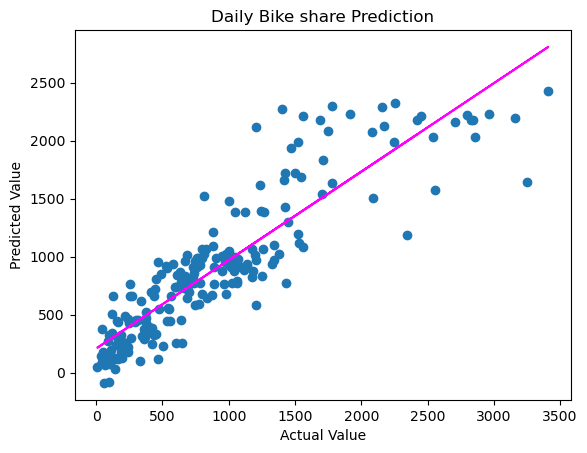

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg=GradientBoostingRegressor()
param={
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,150]
}

# finding the best hyperparameter combination to optimize the r2 metric
score=make_scorer(r2_score)
gridsearch=GridSearchCV(alg,param,scoring=score,cv=3,return_train_score=True)
gridsearch.fit(X_train,y_train)
print('Best Parameter Combination: ',gridsearch.best_params_,"\n")

# get the best model

model=gridsearch.best_estimator_
print(model,'\n')

# evaluate the predictions vs actual
prediction=model.predict(X_test)
mse=mean_squared_error(y_test,prediction)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)
r2=r2_score(y_test,prediction)
print("R2 Score:",r2)


plt.scatter(y_test,prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Daily Bike share Prediction')

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])
MSE:  105231.49493546608
RMSE:  324.3940426941686
R2 Score:  0.7937002588909645


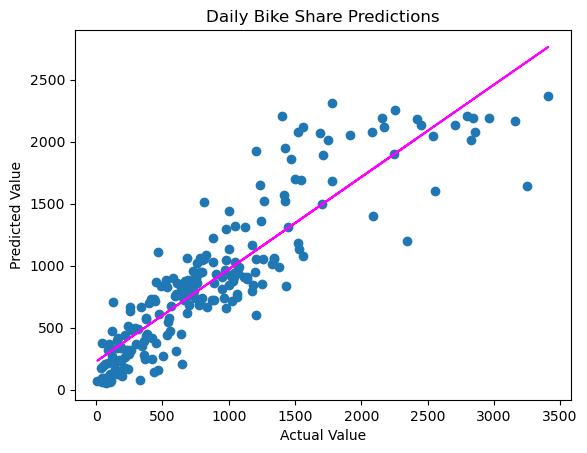

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numerical columns(scale them)
numeric_features=[6,7,8,9]
numeric_transformer=Pipeline(steps=[
    ('scalar',StandardScaler())])

# Define preprocessing for categorical columns(encode them)
categorical_features=[0,1,2,3,4,5]
categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

# combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, numeric_features),
        ('cat',categorical_transformer,categorical_features)])

#create preprocessing and training pipeline
pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor',GradientBoostingRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,y_train)
print(model)

prediction=model.predict(X_test)

mse=mean_squared_error(y_test,prediction)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)
r2=r2_score(y_test,prediction)
print("R2 Score: ",r2)


plt.scatter(y_test,prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())])
MSE:  106085.05817545454
RMSE:  325.7070127821238
R2 Score:  0.7920269017317054


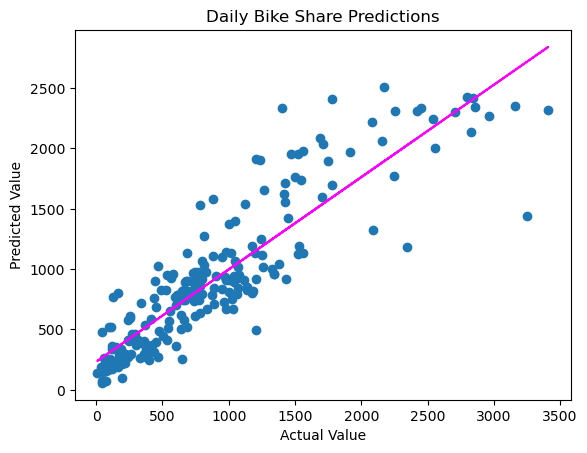

In [81]:
pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor',RandomForestRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,y_train)
print(model)

prediction=model.predict(X_test)

mse=mean_squared_error(y_test,prediction)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)
r2=r2_score(y_test,prediction)
print("R2 Score: ",r2)


plt.scatter(y_test,prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Daily Bike Share Predictions')

z=np.polyfit(y_test,prediction,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

## use the trained model 
let's save the model

In [82]:
import joblib

#save the model as pickel file
filename='./bike-share.pkl'
joblib.dump(model,filename)

['./bike-share.pkl']

now we can load it whenever we want it to use for predicting labels for new data. this is often called scoring or inferencing.

In [83]:
# load the model from the file
loaded_model=joblib.load(filename)
# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print('New Sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)

print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New Sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 99 rentals


In [84]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
583.0
824.0
240.0
188.0
263.0
